## <center>Classification</center>

## 1. Thông tin cá nhân
Họ và tên: Đặng Triệu Kha  
Mã số sinh viên: 22127476  
Lớp học phần: 22KHMT1

## 2. Tự đánh giá
<table border="1">
        <tr>
            <th>STT</th>
            <th>Chi tiết</th>
            <th>Tự đánh giá mức độ hoàn thành</th>
        </tr>
        <tr>
            <td align="center">1</td>
            <td>Classification algorithms implementation</td>
            <td align="center">100 %</td>
        </tr>
        <tr>
            <td align="center">2</td>
            <td>Evaluation</td>
            <td align="center">100 % </td>
        </tr>
        <tr>
            <td align="center">3</td>
            <td>Comparison and Analysis</td>
            <td align="center">100 %</td>
        </tr>
    </table>



**Chuẩn bị thư viện**

In [1]:
%pip install ucimlrepo 

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
# fetch dataset 

In [4]:

adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  

## 3. Classification algorithms implementation - Cài đặt các thuật toán phân loại

Trong dự án này, để tạo ra các bộ dữ liệu được xử lí phù hợp ứng với mỗi thuật toán phân loại, em sẽ thực hiện các cách tiền xử lí dữ liệu khác nhau phù hợp với từng thuật toán. Các bước xử lý dữ liệu chung, áp dụng cho tất cả các thuật toán, sẽ được trình bày trong phần `Tiền xử lý dữ liệu chung cho các thuật toán` dưới đây.

## 3.1 Tiền xử lí dữ liệu chung cho các thuật toán

### 3.1.1 Xử lí thiếu dữ liệu và trùng lặp dữ liệu

In [5]:
X.loc[:,'native-country'] = X['native-country'].fillna(X['native-country'].mode()[0])


In [6]:

X.loc[X['workclass'] == '?', 'workclass'] = np.nan
X.loc[X['occupation'] == '?', 'occupation'] = np.nan

In [7]:
occupation_missing = X[X['occupation'].isnull()]
occupation_not_missing = X[X['occupation'].notnull()]

workclass_missing = X[X['workclass'].isnull()]
workclass_not_missing = X[X['workclass'].notnull()]

In [8]:
# Tạo một hàm để dự đoán giá trị dựa trên các thuộc tính quan trọng
def impute_missing_values(df_missing, df_not_missing, target_column, reference_columns):
    # Điền giá trị mode từ các nhóm được phân loại theo các cột liên quan
    for _, row in df_missing.iterrows():
        # Tạo mask cho các hàng trong df_not_missing có các thuộc tính giống với hàng đang xét của df_missing
        mask = (df_not_missing[reference_columns] == row[reference_columns].values).all(axis=1)
        
        # Kiểm tra nếu có hàng nào thỏa mãn mask, nếu có, lấy giá trị mode từ cột target_column
        if df_not_missing[mask].shape[0] > 0:
            df_missing.loc[row.name, target_column] = df_not_missing[mask][target_column].mode()[0]
        else:
            # Nếu không có hàng nào khớp, điền mode của toàn bộ cột
            df_missing.loc[row.name, target_column] = df_not_missing[target_column].mode()[0]

    return df_missing



In [9]:
# Điền giá trị thiếu cho occupation và workclass

occupation_missing = impute_missing_values(occupation_missing, occupation_not_missing, 
                                           'occupation', ['education', 'education-num', 'age', 'sex', 'hours-per-week'])

workclass_missing = impute_missing_values(workclass_missing, workclass_not_missing, 
                                          'workclass', ['education', 'education-num', 'age', 'sex', 'hours-per-week'])

# Gộp lại dữ liệu đã điền với dữ liệu ban đầu

X.update(occupation_missing)
X.update(workclass_missing)


In [10]:
X_y = pd.concat((X,y), axis= 1)
id = X_y[X_y.duplicated()].index
id

Index([ 4881,  5104,  9171, 11631, 11825, 13084, 15059, 17040, 18555, 18698,
       21318, 21490, 21875, 22300, 22367, 22494, 25872, 26313, 28230, 28522,
       28846, 29157, 30845, 31993, 32404, 33425, 43750, 43773, 46409, 47284,
       48521],
      dtype='int64')

In [11]:
X = X.drop(id)
y = y.drop(id)

In [12]:
X.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [13]:
y['income'] = np.where((y['income'] == '>50K') | (y['income'] == '>50K.'), 1,0)


In [14]:
y = y.values.ravel()

#### 3.1.2 Tiền xử lí chuyển các các giá trị ở các feature thành dạng số

In [15]:
encode_feature = ['workclass', 'marital-status', 'occupation', 'relationship']

In [16]:

X_numeric = pd.get_dummies(X[encode_feature])
X_numeric = X_numeric.astype(int)
X_numeric


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
48838,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48840,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
X_numeric['is Male'] = np.where(X['sex'] == 'Male', 1, 0)

In [18]:
education_order = {
    "Preschool": 0,
    "1st-4th": 1,
    "5th-6th": 2,
    "7th-8th": 3,
    "9th": 4,
    "10th": 5,
    "11th": 6,
    "12th": 7,
    "HS-grad": 8,
    "Some-college": 9,
    "Assoc-voc": 10,
    "Assoc-acdm": 11,
    "Bachelors": 12,
    "Masters": 13,
    "Prof-school": 14,
    "Doctorate": 15
}

# Tạo hàm ánh xạ từ từ điển education_order
def get_education_level(education):
    return education_order.get(education, np.nan)  # trả về np.nan nếu không tìm thấy trong từ điển

# Áp dụng hàm get_education_level cho toàn bộ cột 'education' với numpy.vectorize
X_numeric['education_level'] = np.vectorize(get_education_level)(X['education'])


In [19]:
X_numeric['is-USA'] = np.where((X['native-country'] == 'United-States') | (X['native-country'] == '?'),1,0)

In [20]:
X_numeric[['age', 'fnlwgt', 'education-num ','capital-gain', 'capital-loss','hours-per-week']] = X[['age', 'fnlwgt', 'education-num','capital-gain', 'capital-loss','hours-per-week']]



**Sau khi thực hiện xong bước tiền xử lí chung, ta đã thu được tập dữ liệu có các feature đã ở dạng số.**


In [21]:
X_numeric

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,...,relationship_Wife,is Male,education_level,is-USA,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,12,1,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,1,12,1,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,1,0,...,0,1,8,1,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,0,0,...,0,1,6,1,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,...,1,0,12,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,1,0,0,0,0,1,0,...,0,0,12,1,39,215419,13,0,0,36
48838,0,0,0,1,0,0,0,0,0,0,...,0,1,8,1,64,321403,9,0,0,40
48839,0,0,0,1,0,0,0,0,0,0,...,0,1,12,1,38,374983,13,0,0,50
48840,0,0,0,1,0,0,0,0,1,0,...,0,1,12,1,44,83891,13,5455,0,40


## 3.2 Huấn luyện mô hình phân loại 

### 3.2.1 Giả định bài toán
* Với một mô hình phân loại sẽ có nhiều tiêu chí đánh giá như `f1 score`, `precision`, `recall`,... Tuỳ vào bài toán thực tế hướng đến mục đích gì, ta sẽ xác định được một mô hình tốt phù hợp với bài toán nên ưu tiên xét theo tiêu chí gì. 
* Trong quá trình tiền xử lí dữ liệu, em đã mã hoá cột `income` bằng cách cho giá trị ">50K" là 1, các giá trị "<=50K" là 0, tức là các mẫu ">50K" sẽ là mẫu dương, mẫu "<=50K" là mẫu âm.  
* Trong dự án này, em giả định rằng em đang huấn luyện mô hình phân loại cho các bài toán hướng đến xác định được càng nhiều mẫu dương (nhãn ">50K") và độ tin cậy khi gắn nhãn dương ">50K" cho mẫu cũng phải cao, ví dụ như: chiến dịch tiếp thị cần xác định được càng nhiều những khách hàng có thu nhập cao mà hạn chế nhầm lẫn với những người có thu nhập thấp hơn. Khi đó, các tiêu chí như `f1 score`, `auc-roc` sẽ được chú ý hơn để đánh giá một mô hình phân loại tốt.  



### 3.2.2 Cách tìm ra sự kết hợp tốt nhất giữa các siêu tham số
Em sẽ thực hiện **grid search** với **cross validation** để tìm ra sự kết hợp tốt nhất giữa các siêu tham số (hyperparameter). Tập dữ liệu này có cột `income` (target)  có phân bố dữ liệu lệch, số mẫu dữ liệu có nhãn "<=50K" gấp 3 lần số mẫu có nhãn ">50K". Do đó nếu sử dụng tiêu chí `scoring = accuracy` trong **grid search** thì sẽ không được khách quan. Tuỳ vào mục đích hướng đến của mô hình phân loại, ví dụ như: trong dự án này, em mong muốn có một mô hình phát hiện được càng nhiều và càng chính xác các mẫu ">50K" (mẫu dương theo em quy định) nên em sẽ sử dụng tiêu chí `scoring = f1` trong **grid search**

### 3.2.3 Cài đặt Decision tree và Random forest

**Chia tập dữ liệu**

In [22]:

from sklearn.model_selection import train_test_split
import numpy as np


X_tree_train, X_tree_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42, shuffle= True)



#### 3.2.3.1 Decision tree

**Grid search với cross validation để tìm ra sự kết hợp siêu tham số tốt nhất**

In [23]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Grid Search for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Apply GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring = 'f1')
grid_search_dt.fit(X_tree_train, y_train)

# Best parameters for Decision Tree
best_params_dt = grid_search_dt.best_params_
print("Best parameters for Decision Tree:", best_params_dt)



Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10}


**Huấn luyện mô hình với bộ siêu tham số tốt nhất trên toàn bộ tập huấn luyện**

In [24]:
#Huấn luyện lại mô hình với tham số tốt nhất trên toàn bộ tập huấn luyện
best_dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 10)
start_time = time.time()
best_dt.fit(X_tree_train, y_train)
train_time_dt = time.time() - start_time


#### 3.2.2.2 Random forest

**Grid search với cross validation để tìm ra sự kết hợp siêu tham số tốt nhất**

In [25]:
# Grid Search for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Khởi tạo không gian tham số (param_grid) cho Random Forest
param_grid_rf = {
    'n_estimators': [100,200],      
    
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False]              
}


rf = RandomForestClassifier()


grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring= 'f1')
grid_search_rf.fit(X_tree_train, y_train)


best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)


Best parameters for Random Forest: {'bootstrap': True, 'max_features': 'log2', 'n_estimators': 200}


**Huấn luyện mô hình với bộ siêu tham số tốt nhất trên toàn bộ tập huấn luyện**

In [26]:
#Huấn luyện lại mô hình với tham số tốt nhất trên toàn bộ tập huấn luyện
best_rf = RandomForestClassifier(bootstrap= True, max_features= 'sqrt', n_estimators= 200)
start_time = time.time()
best_rf.fit(X_tree_train, y_train)
train_time_rf = time.time() - start_time

### 3.2.4 Naive Bayes
Để tạo ra bộ dữ liệu có đặc điểm phù hợp với Gaussian Naive Bayes trong thư viện sciki-learn, em đã thực hiện thêm một số bước tiền xử lí dữ liệu trên tập `X_numeric` ở trên, được trình bày ngay bên dưới

#### 3.2.4.1 Chuẩn bị dữ liệu

**Xử lí feature selection bằng Chi-Square**

In [27]:
from sklearn.feature_selection import SelectKBest, chi2

# Chọn k best feature theo chi-square
selector = SelectKBest(score_func=chi2, k='all')  # Chọn tất cả các feature
selector.fit(X_numeric, y)

# Lấy scores của các feature
scores = selector.scores_

# Tạo một dataframe để hiển thị kết quả
feature_scores = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Chi-Square Score': scores
})


threshold = 200
selected_features = feature_scores[feature_scores['Chi-Square Score'] > threshold]
X_nb = (X_numeric[selected_features['Feature']]).copy()
X_nb

,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Exec-managerial,occupation_Handlers-cleaners,occupation_Machine-op-inspct,...,relationship_Unmarried,relationship_Wife,is Male,education_level,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,12,39,77516,13,2174,0,40
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,12,50,83311,13,0,0,13
2,0,1,0,0,0,0,0,0,1,0,...,0,0,1,8,38,215646,9,0,0,40
3,0,0,1,0,0,0,0,0,1,0,...,0,0,1,6,53,234721,7,0,0,40
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,12,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,1,0,0,0,0,0,0,0,0,...,0,0,0,12,39,215419,13,0,0,36
48838,0,0,0,0,0,1,0,0,0,0,...,0,0,1,8,64,321403,9,0,0,40
48839,0,0,1,0,0,0,0,0,0,0,...,0,0,1,12,38,374983,13,0,0,50
48840,0,1,0,0,0,0,1,0,0,0,...,0,0,1,12,44,83891,13,5455,0,40


**Sử dụng `boxcox` để làm cho phân phối của các feature gần với phân phối chuẩn**

In [28]:
from scipy import stats
X_nb['capital-gain'], lambda_1 = stats.boxcox(X_nb['capital-gain'] + 1)  # Thêm 1 nếu có giá trị bằng 0
X_nb['capital-loss'], lambda_2 = stats.boxcox(X_nb['capital-loss'] + 1)

**Chuẩn hoá**

In [29]:
from sklearn.preprocessing import StandardScaler

# Chọn các cột cần chuẩn hóa
features_to_normalize = ['age', 'fnlwgt', 'education_level', 'capital-gain', 'capital-loss', 'hours-per-week']

# Tạo đối tượng StandardScaler
scaler = StandardScaler()

# Áp dụng chuẩn hóa cho các cột trong tập dữ liệu X_nb
X_nb[features_to_normalize] = scaler.fit_transform(X_nb[features_to_normalize])

# In ra một vài dòng của dữ liệu đã chuẩn hóa để kiểm tra
print(X_nb[features_to_normalize].head())


        age    fnlwgt  education_level  capital-gain  capital-loss  \
0  0.025711 -1.061987         1.136571      3.331160      -0.22146   
1  0.828114 -1.007114         1.136571     -0.300192      -0.22146   
2 -0.047235  0.245975        -0.419678     -0.300192      -0.22146   
3  1.046951  0.426598        -1.197803     -0.300192      -0.22146   
4 -0.776693  1.408426         1.136571     -0.300192      -0.22146   

   hours-per-week  
0       -0.034379  
1       -2.213513  
2       -0.034379  
3       -0.034379  
4       -0.034379  


**Chia tập dữ liệu**

In [30]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(X_nb, y, test_size=0.3, random_state=42, shuffle= True)

#### 3.2.4.2 Huấn luyện mô hình

**Grid search với cross validation để tìm ra sự kết hợp siêu tham số tốt nhất**

In [31]:
from sklearn.naive_bayes import GaussianNB


# Triển khai Gaussian Naive Bayes
gnb = GaussianNB()

# Tuning tham số var_smoothing
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.9]}

# Sử dụng GridSearchCV để tìm giá trị tối ưu của var_smoothing
grid_search_gnb = GridSearchCV(gnb, param_grid, cv=5, scoring= 'f1')
grid_search_gnb.fit(X_nb_train, y_nb_train)

# In ra tham số tối ưu
print("Best var_smoothing:", grid_search_gnb.best_params_)





Best var_smoothing: {'var_smoothing': 0.01}


**Huấn luyện mô hình với bộ siêu tham số tốt nhất trên toàn bộ tập huấn luyện**

In [32]:

 #Huấn luyện lại mô hình với tham số tốt nhất trên toàn bộ tập huấn luyện
best_gnb = GaussianNB(var_smoothing=0.01)
start_time = time.time()
best_gnb.fit(X_nb_train, y_nb_train)
train_time_nb = time.time() - start_time

### 3.2.5 Support Vector Machine (SVM)


#### 3.2.5.1 Chuẩn bị dữ liệu
Để tạo ra bộ dữ liệu có đặc điểm phù hợp với SVC trong thư viện scikit-learn, em đã thực hiện thêm một số bước tiền xử lí dữ liệu trên tập `X_numeric` ở trên, được trình bày ngay bên dưới

**Giảm chiều với PCA** (chỉ với mục đích giảm chiều để giảm thời gian chạy :v)

In [33]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
X_svm = X_nb.copy()

pca = PCA(n_components=0.9) 
X_pca = pca.fit_transform(X_svm)




**Chia tập dữ liệu**

In [34]:
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, shuffle= True)

#### 3.2.5.2 Huấn luyện mô hình

Với SVM, em cũng đã thực hiện Grid search để tìm bộ siêu tham số tốt nhất. Tuy nhiên vì thời gian chạy là quá lâu (hơn 5 tiếng) nên em đã xoá cell này đi và chỉ giữ lại bộ siêu tham số tốt nhất để huấn luyện mô hình.

##### a. SVM với kernel rbf

In [35]:

svm_rbf = SVC(kernel='rbf',probability= True, C=1, gamma= 0.01)

start_time = time.time()
svm_rbf.fit(X_svm_train, y_svm_train)
train_time_svm_rbf = time.time() - start_time




##### b. SVM với kernel sigmoid

In [36]:

svm_sm = SVC(kernel='sigmoid',probability= True, C=1, gamma= 0.01)


start_time = time.time()
svm_sm.fit(X_svm_train, y_svm_train)
train_time_svm_sm = time.time() - start_time


##### c. SVM với kernel poly

In [37]:

svm_pl = SVC(kernel='poly',probability= True, C=1, gamma= 0.01)

start_time = time.time()
svm_pl.fit(X_svm_train, y_svm_train)
train_time_svm_pl = time.time() - start_time



##### d. SVM với kernel linear

In [38]:

svm_ln = SVC(kernel='linear',probability= True, C=1)

start_time = time.time()
svm_ln.fit(X_svm_train, y_svm_train)
train_time_svm_ln = time.time() - start_time





### 3.2.6 Neural network
Với Neural network thì em sử dụng cùng bộ dữ liệu của thuật toán Gaussian Naive Bayes

Dưới đây là đoạn mã em sử dụng để tìm được bộ siêu tham số tốt nhất bằng grid search. Vì thời gian chạy rất lâu nên em đã comment lại đoạn mã. Bộ siêu tham số tốt nhất sau khi grid search là: hidden_layer_sizes = 50, learning_rate='constant', activation='tanh'

In [39]:
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.neural_network import MLPClassifier

# from sklearn.model_selection import KFold
# from sklearn.metrics import classification_report


# # Định nghĩa không gian tham số để thử nghiệm
# param_grid = {
#     'hidden_layer_sizes': [(30,),(50,), (100,), (100, 50)],  # Các kích thước lớp ẩn khác nhau
#     'activation': ['relu', 'tanh', 'logistic'],                      # Các hàm kích hoạt
#     'learning_rate': ['constant']
#     'learning_rate_init': [0.01, 0.1]                                 # Regularization term
# }

# # Khởi tạo mô hình MLP
# mlp = MLPClassifier(max_iter=1000, random_state=42)

# # Khởi tạo GridSearchCV với k-fold cross-validation
# grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1, verbose=1, scoring='f1')

# # Huấn luyện mô hình với GridSearchCV
# grid_search_mlp.fit(X_nb_train, y_train)\

# # In ra các tham số tốt nhất
# print("Best Hyperparameters:", grid_search_mlp.best_params_)

# # Dự đoán với mô hình tốt nhất
# y_pred = grid_search_mlp.predict(X_nb_test)

# # Đánh giá mô hình
# print("Classification Report:")
# print(classification_report(y_test, y_pred))




**Huấn luyện mô hình:**

In [40]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score


mlp = MLPClassifier(
    hidden_layer_sizes=(50,), 
    learning_rate_init= 0.1, 
    learning_rate='constant',
    activation='tanh',  # Sử dụng sigmoid làm hàm kích hoạt
    max_iter=1000,  # Số vòng lặp huấn luyện tối đa
    solver='adam'  # Sử dụng thuật toán Adam để tối ưu hóa
)

# Huấn luyện mô hình
start_time = time.time()
mlp.fit(X_nb_train, y_train)
train_time_mlp = time.time() - start_time





## 4. Đánh giá mô hình

### 4.1 Xây dựng hàm đánh giá

**Hàm tìm confusion matrix và accuracy**

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def calculate_accuracy(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    return accuracy


**Hàm tìm các thông số đánh giá: Precision, Recall, Specificity, F1 Score**

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, pos_label= 1)
    recall = recall_score(y_true, y_pred, pos_label= 1)
    f1 = f1_score(y_true, y_pred, pos_label= 1)
    
    # Tính specificity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    return precision, recall, specificity, f1


**Hàm vẽ đường cong ROC và tìm AUC score**

In [43]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_prob, model_name):
    # Tính giá trị ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc


**Hàm tổng hợp để đánh giá mô hình**

In [44]:
def evaluate_model(model, X_test, y_test, model_name):
    # Dự đoán nhãn
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Lấy xác suất cho lớp "positive"

    # Đánh giá Confusion Matrix và Accuracy
    plot_confusion_matrix(y_test, y_pred, model_name)
    accuracy = calculate_accuracy(y_test, y_pred)

    # Đánh giá Precision, Recall, Specificity, F1 Score
    precision, recall, specificity, f1 = calculate_metrics(y_test, y_pred)

    # Đánh giá ROC Curve và AUC
    auc_score = plot_roc_curve(y_test, y_prob, model_name)
    print("auc_score: ", auc_score)

    return accuracy, precision, recall, specificity, f1, auc_score


### 4.2 Đánh giá Decision tree

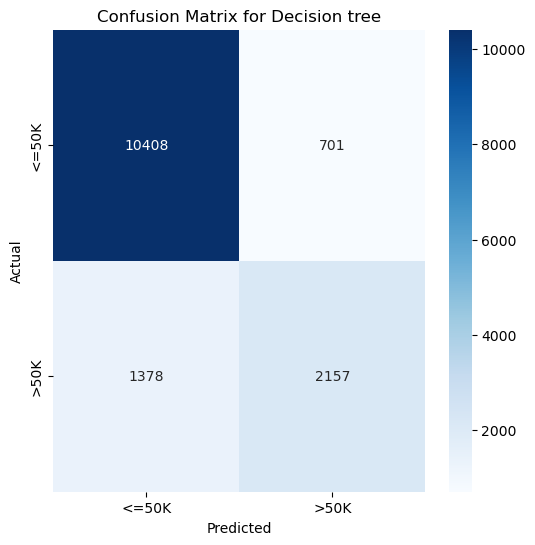

Accuracy: 0.8580
Precision: 0.7547
Recall: 0.6102
Specificity: 0.9369
F1 Score: 0.6748


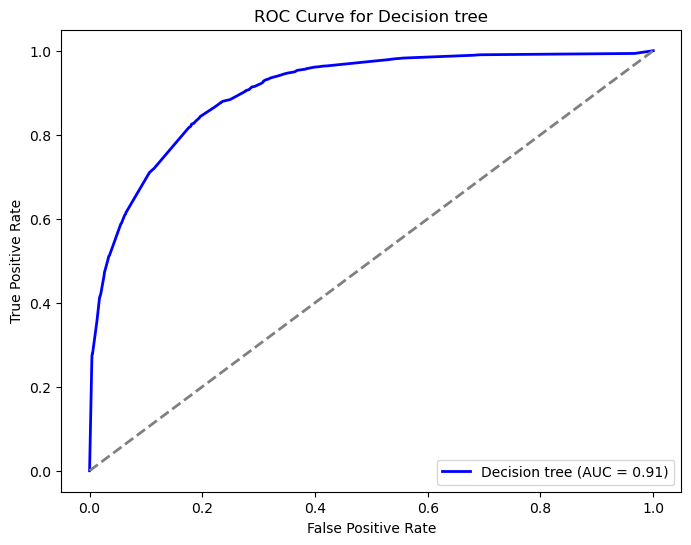

auc_score:  0.9050183580141896


In [45]:
accuracy_dt, precision_dt, recall_dt, specificity_dt, f1_dt, auc_score_dt = evaluate_model(best_dt, X_tree_test, y_test, model_name= "Decision tree")

### 4.3 Đánh giá Random Forest

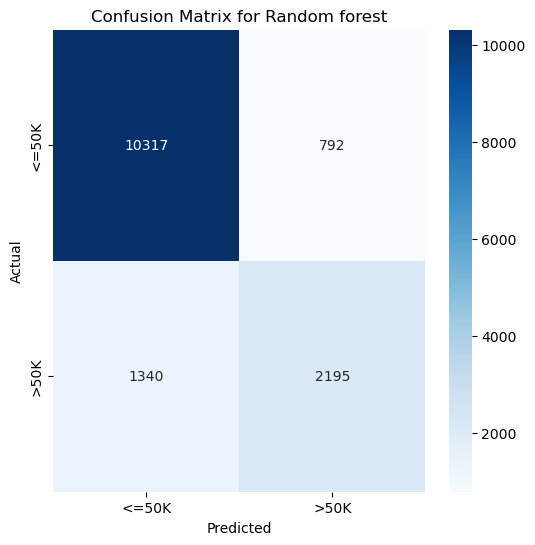

Accuracy: 0.8544
Precision: 0.7349
Recall: 0.6209
Specificity: 0.9287
F1 Score: 0.6731


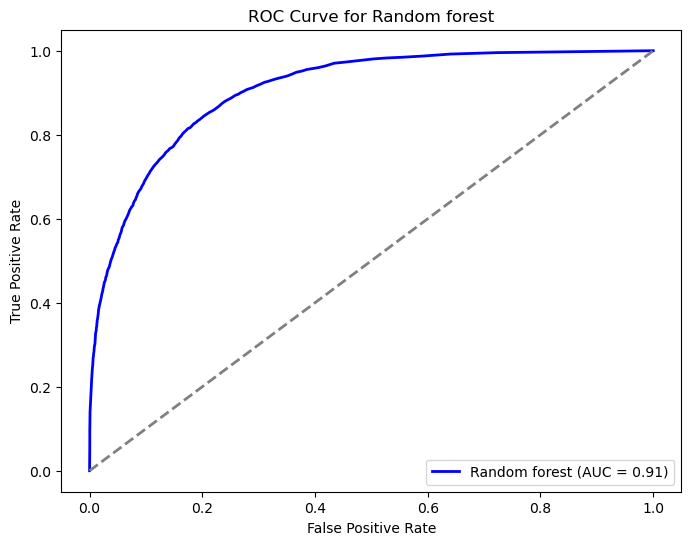

auc_score:  0.9059112461919391


In [46]:
accuracy_rf, precision_rf, recall_rf, specificity_rf, f1_rf, auc_score_rf = evaluate_model(best_rf, X_tree_test, y_test, model_name= "Random forest")

### 4.4 Đánh giá Gaussian Naive Bayes

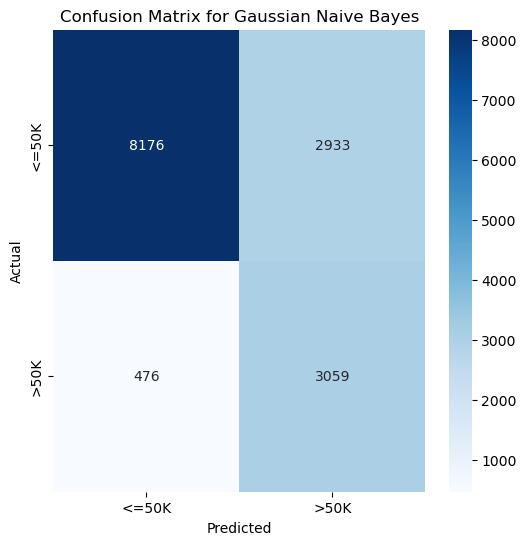

Accuracy: 0.7672
Precision: 0.5105
Recall: 0.8653
Specificity: 0.7360
F1 Score: 0.6422


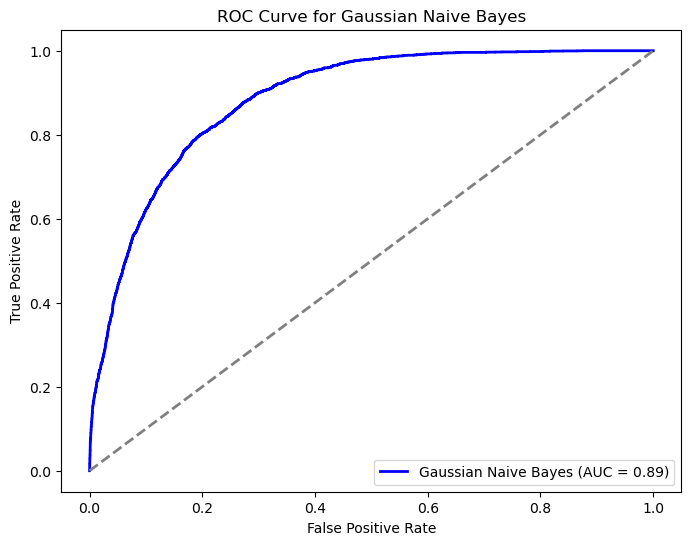

auc_score:  0.8857202826104146


In [47]:
accuracy_nb, precision_nb, recall_nb, specificity_nb, f1_nb, auc_score_nb = evaluate_model(best_gnb, X_nb_test, y_nb_test, model_name= "Gaussian Naive Bayes")

### 4.5 Đánh giá SVM với kernel rbf

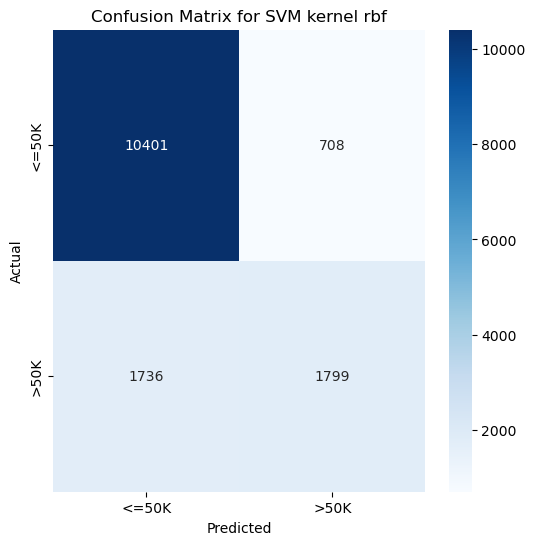

Accuracy: 0.8331
Precision: 0.7176
Recall: 0.5089
Specificity: 0.9363
F1 Score: 0.5955


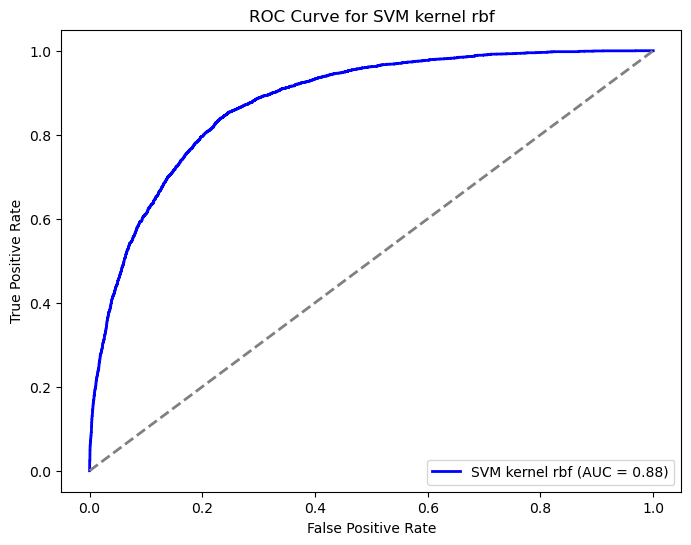

auc_score:  0.8785749872390889


In [48]:
accuracy_svm_rbf, precision_svm_rbf, recall_svm_rbf, specificity_svm_rbf, f1_svm_rbf, auc_score_svm_rbf = evaluate_model(svm_rbf, X_svm_test, y_svm_test, model_name= "SVM kernel rbf")

### 4.6 Đánh giá SVM với kernel sigmoid

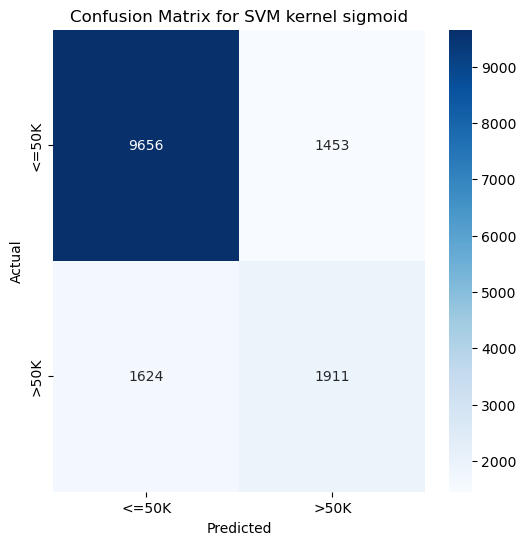

Accuracy: 0.7899
Precision: 0.5681
Recall: 0.5406
Specificity: 0.8692
F1 Score: 0.5540


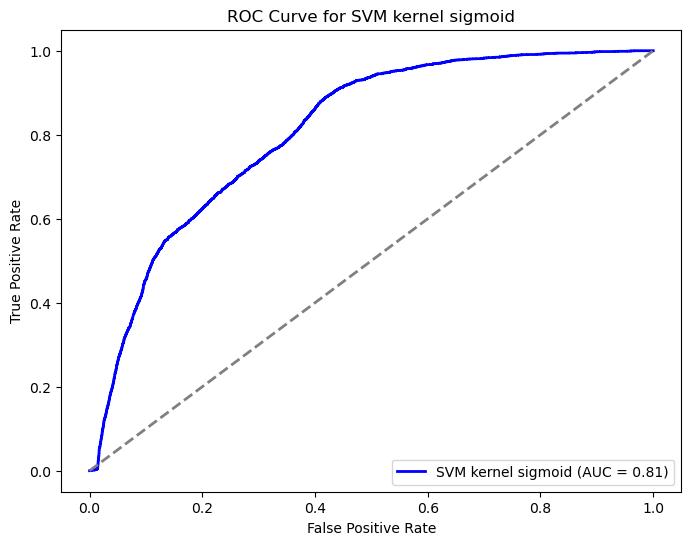

auc_score:  0.8087369556368469


In [49]:
accuracy_svm_sm, precision_svm_sm, recall_svm_sm, specificity_svm_sm, f1_svm_sm, auc_score_svm_sm = evaluate_model(svm_sm, X_svm_test, y_svm_test, model_name= "SVM kernel sigmoid")

### 4.7 Đánh giá SVM với kernel poly

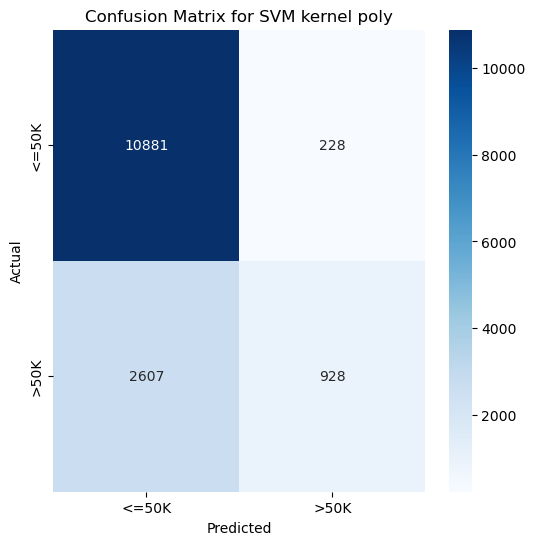

Accuracy: 0.8064
Precision: 0.8028
Recall: 0.2625
Specificity: 0.9795
F1 Score: 0.3957


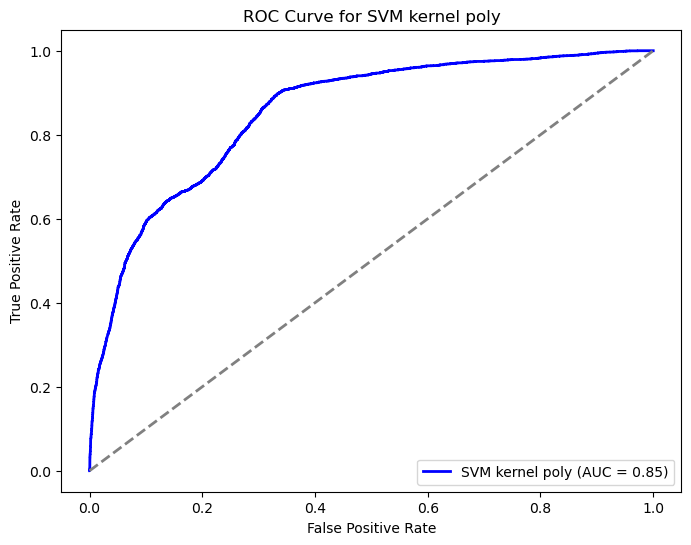

auc_score:  0.8536904656863588


In [50]:
accuracy_svm_pl, precision_svm_pl, recall_svm_pl, specificity_svm_pl, f1_svm_pl, auc_score_svm_pl = evaluate_model(svm_pl, X_svm_test, y_svm_test, model_name= "SVM kernel poly")

### 4.8 Đánh giá SVM với kernel linear

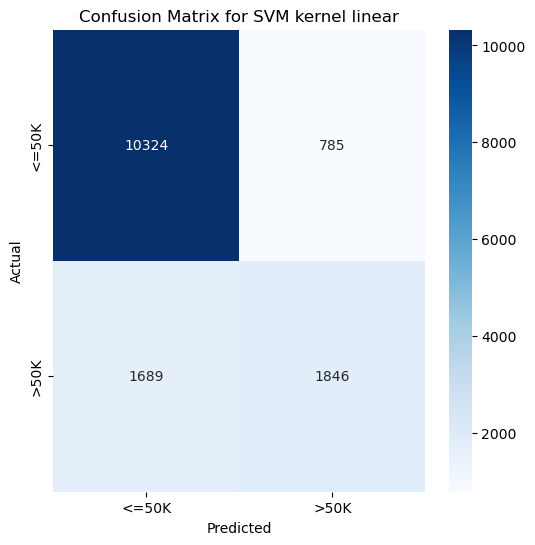

Accuracy: 0.8311
Precision: 0.7016
Recall: 0.5222
Specificity: 0.9293
F1 Score: 0.5988


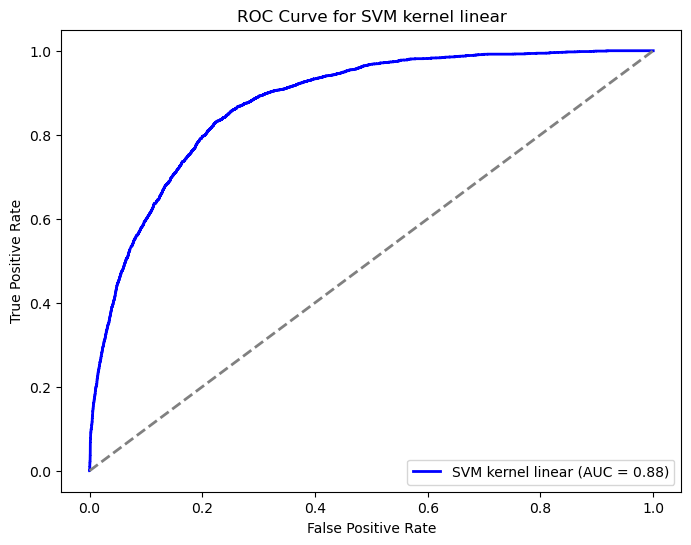

auc_score:  0.8773083307327686


In [51]:
accuracy_svm_ln, precision_svm_ln, recall_svm_ln, specificity_svm_ln, f1_svm_ln, auc_score_svm_ln = evaluate_model(svm_ln, X_svm_test, y_svm_test, model_name= "SVM kernel linear")

### 4.9 Đánh giá Multilayer Layer Perceptron

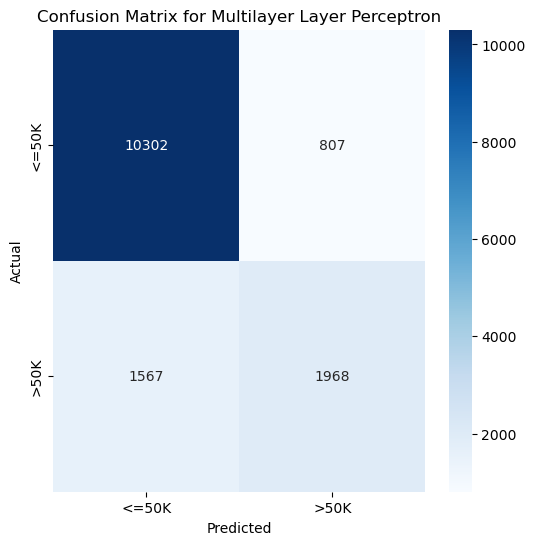

Accuracy: 0.8379
Precision: 0.7092
Recall: 0.5567
Specificity: 0.9274
F1 Score: 0.6238


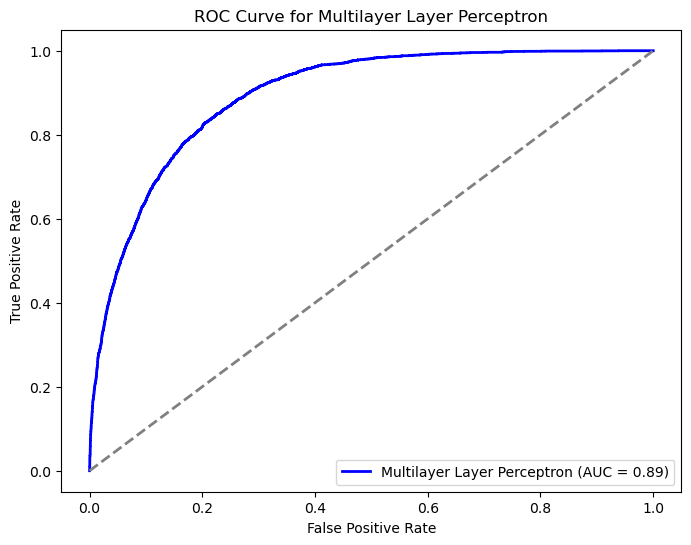

auc_score:  0.894606307588824


In [52]:
accuracy_mlp, precision_mlp, recall_mlp, specificity_mlp, f1_mlp, auc_score_mlp = evaluate_model(mlp, X_nb_test, y_nb_test, model_name= "Multilayer Layer Perceptron")

### 4.10 Phân tích và đánh giá

* **Nhận xét chung về sự đánh đổi giữa các thông số đánh giá:**
    - Các mô hình có `precision` cao thì `recall` thấp. Nguyên nhân có thể vì với một mô hình có precision cao thì khi dự đoán một mẫu, mô hình phải "rất chắc chắn" mẫu đó là mẫu ">50K." (mẫu dương) thì mới "dám" gán nhãn ">50K." cho mẫu đó; điều này có thể dẫn đến mô hình sẽ bỏ sót nhiều mẫu ">50K." (mẫu dương) $\rightarrow$ recall thấp. Và ngược lại.
    - Các mô hình có `accuracy` cao thì `f1 score` thấp và ngược lại. Vì  dữ liệu huấn luyện này có phân phối lệch về mẫu âm ("=50K."), mô hình có accuracy cao có thể đạt được bằng cách phân loại chủ yếu mẫu âm ("<=50K") chính xác, nhưng lại bỏ sót rất nhiều mẫu dương (>50K), làm F1 score thấp. Và ngược lại.

* **Nhận xét chi tiết về các thông số đánh giá:**

**Chuẩn bị hàm vẽ đồ thị**

In [53]:
import matplotlib.pyplot as plt

def plot_bar_chart(values, labels, chart_title):
    """
    Hàm vẽ biểu đồ bar chart.
    
    Parameters:
    - values: danh sách các giá trị (numbers) để vẽ biểu đồ.
    - labels: danh sách các nhãn tương ứng với các giá trị.
    - chart_title: tên của biểu đồ.
    """
    # Kiểm tra độ dài của labels và values có phù hợp không
    if len(values) != len(labels):
        print("Error: The number of values and labels must be the same.")
        return
    
    # Vẽ biểu đồ bar chart
    bars = plt.bar(labels, values, color='skyblue')

    # Thêm tiêu đề và các nhãn cho trục
    plt.title(chart_title)
    plt.xlabel('Labels')
    plt.ylabel('Values')

    # Xoay nhãn trục x để tránh bị chồng
    plt.xticks(rotation=45)
    
    # Thêm giá trị lên trên mỗi bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01,  # Điều chỉnh vị trí giá trị
                 round(yval, 2), ha='center', va='bottom')

    # Hiển thị đồ thị
    plt.show()


In [54]:
precision_value_list = [precision_dt, precision_rf, precision_nb, precision_svm_rbf, precision_svm_pl, precision_svm_sm,precision_svm_ln,precision_mlp]
f1_value_list = [f1_dt, f1_rf, f1_nb, f1_svm_rbf, f1_svm_pl, f1_svm_sm,f1_svm_ln,f1_mlp]
accuracy_value_list = [accuracy_dt, accuracy_rf, accuracy_nb, accuracy_svm_rbf, accuracy_svm_pl, accuracy_svm_sm,accuracy_svm_ln,accuracy_mlp]
recall_value_list = [recall_dt, recall_rf, recall_nb, recall_svm_rbf, recall_svm_pl, recall_svm_sm,recall_svm_ln,recall_mlp]
specifity_value_list = [specificity_dt, specificity_rf, specificity_nb, specificity_svm_rbf, specificity_svm_pl, specificity_svm_sm,specificity_svm_ln,specificity_mlp]
auc_value_list = [auc_score_dt, auc_score_rf, auc_score_nb, auc_score_svm_rbf, auc_score_svm_pl, auc_score_svm_sm,auc_score_svm_ln,auc_score_mlp]
label = ['decision tree','random forest','naive bayes','svm rbf','svm poly','svm sigmoid','svm linear', 'neural network']


**Nhận xét**

- Về **Precision**:
     - Mô hình có precision cao nhất: SVM với kernel Poly . Điều này có nghĩa là khi mô hình này dự đoán một người có thu nhập >50K, độ tin cậy là rất cao rằng người đó thực sự có thu nhập >50K. Trong ngữ cảnh bài toán thu nhập, mô hình này sẽ rất hữu ích khi các nhà tuyển dụng, ngân hàng hoặc các chiến dịch tiếp thị cần xác định những khách hàng có thu nhập cao mà không muốn nhầm lẫn với những người có thu nhập thấp hơn.
        - Lí do khiến cho SVM với kernel Poly có precision cao nhất có thể do: Kernel Poly tạo ra các ranh giới phân loại mạnh mẽ, giúp mô hình dễ dàng phân loại chính xác các mẫu có thu nhập cao (>50K). Tuy nhiên, việc bỏ sót nhiều mẫu thu nhập >50 (low recall) có thể là do mô hình chỉ tập trung vào những đặc trưng mạnh mẽ và dễ nhận diện của các mẫu >50K, bỏ qua các trường hợp khó khăn hơn.        
    - Mô hình có precison thấp nhất: Gaussian Naive Bayes.  Điều này có nghĩa là khi mô hình này dự đoán một người có thu nhập >=50K, chỉ có khoảng 56% khả năng mẫu đó thực sự có thu nhập >50K. Điều này cho thấy mô hình này rất dễ mắc phải lỗi false positives, tức là gán nhãn >50K cho những người có thu nhập thực tế thấp <=50K.

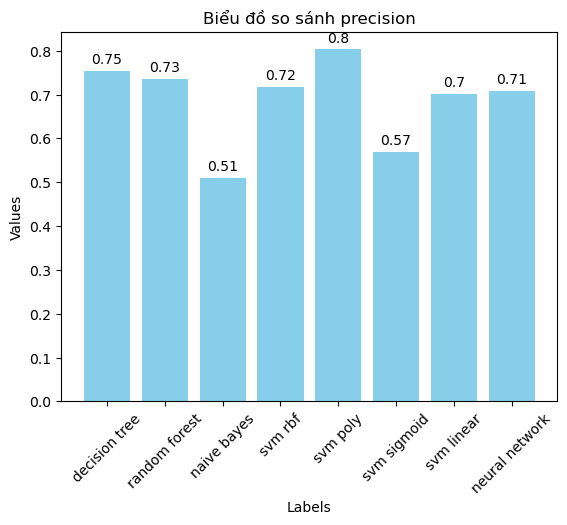

In [55]:
plot_bar_chart(precision_value_list, label, 'Biểu đồ so sánh precision')

- **Về Recall:**
    - Mô hình có recall lớn nhất: Gaussian Naive Bayes. Điều này cho thấy mô hình này nhận diện được nhiều mẫu thu nhập cao (>50K) hơn các mô hình khác. Điều này rất quan trọng trong những trường hợp như quảng cáo tiếp thị, khi doanh nghiệp muốn nhắm đến những khách hàng có thu nhập cao nhưng không muốn bỏ sót bất kỳ ai có khả năng tiềm năng.
    - Mô hình có recall nhỏ nhất: SVM với kernel poly. Điều này chô thấy mô hình này bỏ sót nhiều mẫu thu nhập cao (>50K)

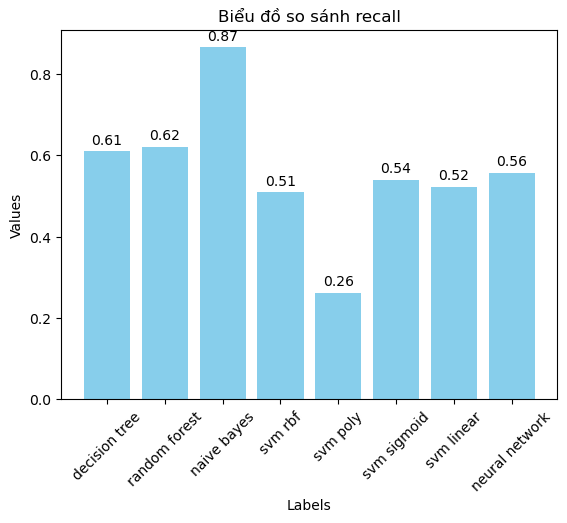

In [56]:
plot_bar_chart(recall_value_list, label, 'Biểu đồ so sánh recall')

- Về **F1 Score**
    - Mô hình có F1 score cao nhất: Decision Tree và Random Forest, cho thấy mô hình này duy trì một sự cân bằng hợp lý giữa precision và recall. Điều này cho thấy Decision Tree và Random Forest có thể nhận diện nhiều mẫu dương (>50K) mà không tạo ra quá nhiều false positives, giúp tối ưu hóa hiệu suất của mô hình trong việc dự đoán thu nhập cao >50K. Điều này sẽ phù hợp cho bài toán mà em đã giả định ở trên rằng càng phát hiện được nhiều mẫu ">50K." mà ít bị nhầm lẫn với mẫu "<=50K".
    - Mô hình có F1 score thấp nhất: SVM với kernel Poly (0.3957), cho thấy mặc dù precision rất cao, nhưng recall thấp dẫn đến một F1 score thấp, vì mô hình không nhận diện đủ số lượng mẫu dương (>=50K) cần thiết.
     
        

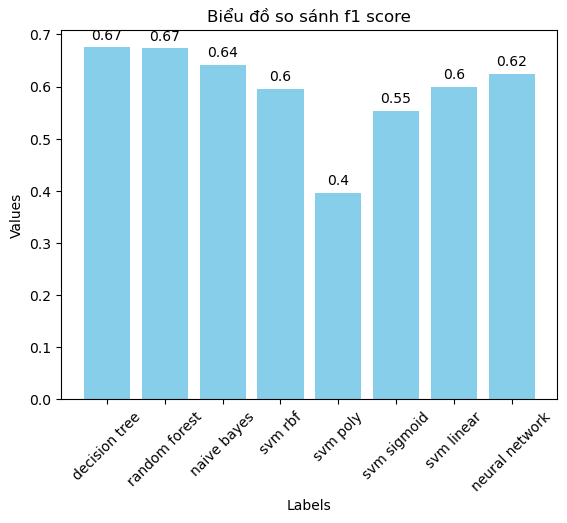

In [57]:
plot_bar_chart(f1_value_list, label, 'Biểu đồ so sánh f1 score')

  - Về **Accuracy**
    - Mô hình có accuracy cao nhất: Decision Tree (0.8583). Mô hình Decision tree này cũng có các thông số khác như `f1 score`, `recall`, `auc score`, `specifity` cao, cho thấy Decision tree hoạt động khá ổn định và có khả năng nhận diện đúng các mẫu thu nhập >50K và <=50K. 
    - Mô hình có accuracy thấp nhất: Gaussian Naive Bayes. Nguyên nhân có thể là vì tập dữ liệu này có các feature không tuân theo phân phối chuẩn. Mặc dù em đã thực hiện vài bước tiền xử lí dữ liệu như `log-transform`, `normalize` để chuẩn hoá và kéo gần khoảng cách giữa các điểm dữ liệu, nhưng có vẻ việc này vẫn chưa giúp cải thiện đủ cho Gaussian Naive Bayes.
        
        

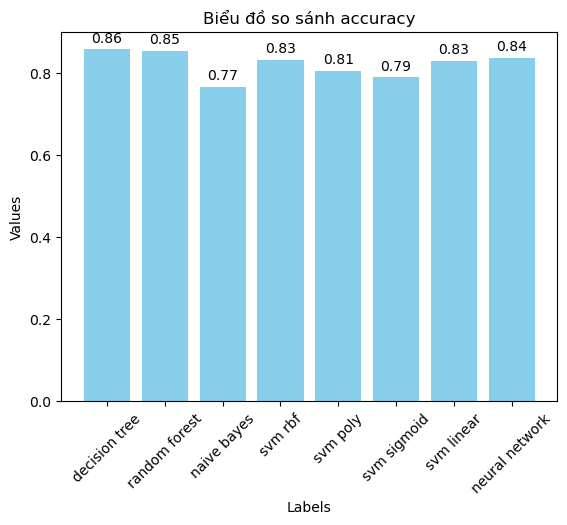

In [58]:
plot_bar_chart(accuracy_value_list, label, 'Biểu đồ so sánh accuracy')

- Về **AUC score**
    - Các mô hình Random Forest và Decision Tree có AUC cao nhất (xấp xỉ 0.91), chứng tỏ rằng chúng có khả năng phân biệt tốt giữa các mẫu thu nhập >50K và <=50K. AUC cao cũng gợi ý rằng cả Random Forest và Decision Tree đều có khả năng phân loại đúng mẫu dương (>50K) và mẫu âm (<=50K) với độ tin cậy cao.
    - Các mô hình SVM với kernel sigmoid và poly có AUC thấp hơn, điều này cho thấy chúng có khả năng phân biệt các mẫu không tốt bằng Decision Tree và Random Forest, mặc dù các mô hình này có thể có precision và recall ở mức khá.

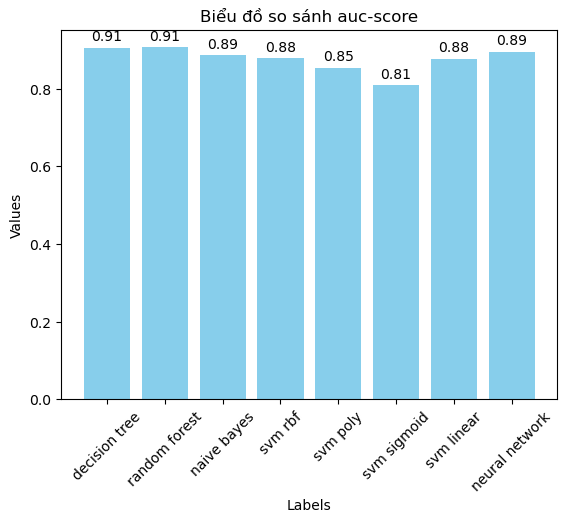

In [59]:
plot_bar_chart(auc_value_list, label, 'Biểu đồ so sánh auc-score')

## 5. Comparison and Analysis - So sánh và phân tích

**Phần so sánh các thông số đánh giá như f1 score, precision, ... đã được trình bày kĩ ở phần trên (phần đánh giá mô hình) nên trong phần này sẽ không nhắc lại, mà chỉ sử dụng ở phần chọn mô hình tốt nhất bên dưới**

### 5.1 So sánh thời gian chạy
Thời gian huấn luyện đã được đo ở phần **Huấn luyện mô hình**

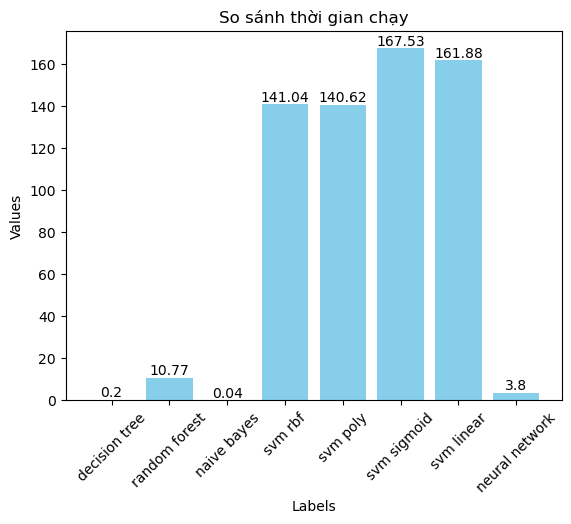

In [60]:
train_time_list = [train_time_dt, train_time_rf, train_time_nb, train_time_svm_rbf, train_time_svm_pl, train_time_svm_sm, train_time_svm_ln, train_time_mlp]
plot_bar_chart(train_time_list, label, "So sánh thời gian chạy")

* **Nhận xét:**  
Thời gian chạy Decision tree $\lt$ Gaussian Naive Bayes $\lt$  Multilayer Layer Perceptron $\lt$ Random Forest $\lt$ SVM với kernel poly $\lt$ SVM với kernel linear $\lt$ SVM với kernel rbf $\lt$ SVM với kernel sigmoid. Kết quả đo thời gian có thể thay đổi ở mỗi lần chạy.  
  
  
* **Nhận xét về sự đánh đổi giữa thời gian chạy và chất lượng dự đoán:**
    - Chất lượng dự đoán của mô hình dựa vào các thông số đánh giá như precision, accuracy, F1 score, recall, auc score,... Tuỳ vào bài toán hướng đến mục đích gì mà quyết định dựa vào thông số nào để đánh giá thế nào là một mô hình tốt. Dưới đây, em sẽ đưa ra nhận xét về sự tương quan giữa thời gian chạy và các thông số này của mỗi thuật toán.
    - Decision tree:
        - Tốc độ: Decision Tree rất nhanh khi huấn luyện , cho phép huấn luyện nhanh chóng và ứng dụng thực tế trong các bài toán yêu cầu thời gian tính toán nhanh.
        - Chất lượng dự đoán: Mô hình này có Precision khá cao (0.7563), Recall ổn (0.6093), và F1 Score vừa phải (0.6749). Mặc dù tốc độ huấn luyện nhanh, nhưng nó vẫn duy trì được chất lượng dự đoán tốt, đặc biệt phù hợp với các ứng dụng yêu cầu sự nhanh chóng nhưng không làm giảm chất lượng quá nhiều.
        - Tương quan giữa tốc độ và chất lượng dự đoán: Với tốc độ nhanh và chất lượng dự đoán chấp nhận được, Decision Tree là sự cân bằng tốt giữa tốc độ và chất lượng trong nhiều tình huống.
    - Random Forest:
        - Tốc độ: Thời gian huấn luyện của Random Forest tương đối lâu , do mô hình phải xây dựng nhiều cây quyết định.
        - Chất lượng dự đoán: Random Forest có AUC cao (0.906), cho thấy khả năng phân biệt tốt giữa các lớp (>=50K và <50K). Cả F1 score và Recall của nó cũng khá cao , điều này có nghĩa là mô hình có khả năng nhận diện được nhiều mẫu thu nhập cao (>50K) và độ tin cậy khi dự đoán mẫu >50K cao.
        - Tương quan giữa tốc độ và chất lượng dự đoán: Mặc dù thời gian huấn luyện lâu hơn nhiều so với Decision Tree, nhưng Random Forest có khả năng phân loại chính xác hơn và khả năng tổng quát cao hơn. Tuy nhiên, sự đánh đổi là thời gian huấn luyện dài hơn đáng kể, điều này có thể làm giảm hiệu quả trong các tình huống cần tốc độ cao.
    - Gaussian Naive Bayes:
        - Tốc độ: Naive Bayes có thời gian huấn luyện cực kỳ nhanh, rất lý tưởng cho các ứng dụng cần tính toán nhanh hoặc với dữ liệu lớn.
        - Chất lượng dự đoán: Mô hình này có Recall cao (0.8653), rất mạnh trong việc nhận diện các mẫu thu nhập cao (>50K), nhưng lại có Precision thấp (0.5105), điều này có thể dẫn đến nhiều false positives.
        -  Tương quan giữa tốc độ và chất lượng dự đoán: Naive Bayes có thời gian huấn luyện cực nhanh, nhưng chất lượng dự đoán không bằng các mô hình phức tạp hơn như Decision Tree hoặc Random Forest. Nếu cần tốc độ mà không yêu cầu độ chính xác cao, Naive Bayes là lựa chọn tốt.  
    - SVM kernel linear:
        - Tốc độ: Mặc dù không nhanh như Decision Tree hay Naive Bayes, thời gian huấn luyện của SVM với kernel Linear vẫn chấp nhận được.
        - Chất lượng dự đoán: Mô hình này có Precision tốt (0.7016) và Recall khá thấp (0.5222), dẫn đến F1 Score vừa phải (0.5988).
        - Tương quan giữa tốc độ và chất lượng dự đoán: Thời gian huấn luyện của SVM với kernel Linear khá lâu, nhưng mô hình chỉ có chất lượng dự đoán khá.  Với thời gian huấn luyện dài nhưng không có cải thiện đáng kể về chất lượng dự đoán so với các mô hình nhanh hơn. Theo em, đây không phải là một lựa chọn tốt trong đa số các bài toán với tập dữ liệu huấn luyện này.
    - SVM kernel rbf:
        - Tốc độ: SVM với kernel RBF có thời gian huấn luyện rất lâu , điều này làm cho mô hình này trở nên kém hiệu quả trong môi trường yêu cầu tính toán nhanh.
        - Chất lượng dự đoán: SVM với kernel RBF có Precision ổn (0.7176) và Recall khá thấp (0.5089), cho thấy mô hình không nhận diện hết các mẫu dương (>50K).
        - Tương quan giữa tốc độ và chất lượng dự đoán: Mặc dù có chất lượng dự đoán khá, nhưng tốc độ huấn luyện của SVM với kernel RBF rất chậm. Đây sẽ không phải 1 lựa chọn tốt.
    - SVM kernel sigmoid:
        - Tốc độ: SVM với kernel Sigmoid có thời gian huấn luyện rất lâu, tương đương với SVM với kernel RBF.
        - Chất lượng dự đoán: Mặc dù có Precision thấp (0.5681) và Recall trung bình (0.5406), SVM với kernel Sigmoid không phải là sự lựa chọn tốt khi cần kết quả nhanh chóng và chính xác.
        - Tương quan giữa tốc độ và chất lượng dự đoán: Tốc độ huấn luyện rất chậm nhưng chất lượng dự đoán không tốt bằng các mô hình khác, đây sẽ không phải lựa chọn tốt.
    - Multi perceptron layer:
        - Tốc độ: MLP có thời gian huấn luyện vừa phải , nhanh hơn SVM và Random Forest, nhưng chậm hơn Decision Tree và Naive Bayes.
        - Tương quan giữa tốc độ và chất lượng dự đoán: MLP có Recall khá cao (0.7516), cho thấy khả năng nhận diện mẫu thu nhập cao (>50K) tốt, nhưng Precision thấp (0.5991) khiến mô hình dễ bị nhầm lẫn với mẫu âm (<=50K). Nếu mục đích của bài toán hướng đến recall cao thì MLP sẽ là một lựa chọn hợp lí vì nó có tốc độ trung bình và chất lượng đánh giá recall tốt.
        


### 5.2 So sánh scalability

In [61]:
import time
import psutil
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def measure_scalability(X_train, y_train,  model):
    """
    Đo lường scalability của mô hình trên các kích thước tập dữ liệu khác nhau.
    """
    # Lấy kích thước tối đa của X_train
    max_size = X_train.shape[0]  # Kích thước tối đa là số mẫu trong X_train

    # Định nghĩa các kích thước tập huấn luyện con (tăng dần)
    sizes = [int(max_size * frac) for frac in [  0.1, 0.2, 0.5, 0.75, 1.0]]  

    # Lưu trữ các kết quả để vẽ đồ thị
    train_times = []
    

    for size in sizes:
        X_train_sample = X_train[:size]
        y_train_sample = y_train[:size]

        # Tạo một bản sao của mô hình để tránh thay đổi mô hình gốc
        model_clone = clone(model)
        


        # Đo thời gian huấn luyện
        start_time = time.time()
        model_clone.fit(X_train_sample, y_train_sample)
        train_time = time.time() - start_time

       

        # Lưu kết quả vào danh sách
        train_times.append(train_time)
    
       
        # In kết quả
        print(f"Training Time for {size} samples: {train_time:.4f} seconds")
        
    # Vẽ đồ thị
    fig, axes = plt.subplots(1, 1, figsize=(6, 5))

    # Đồ thị 1: Thời gian huấn luyện vs kích thước tập dữ liệu
    axes.plot(sizes, train_times, marker='o', color='b', label='Training Time')
    axes.set_title('Training Time vs Dataset Size')
    axes.set_xlabel('Dataset Size')
    axes.set_ylabel('Training Time (seconds)')
    axes.grid(True)

   

    plt.tight_layout()
    plt.show()




**Đánh giá scalability của Decison tree**

Training Time for 3416 samples: 0.0659 seconds
Training Time for 6833 samples: 0.0677 seconds
Training Time for 17083 samples: 0.0945 seconds
Training Time for 25625 samples: 0.1573 seconds
Training Time for 34167 samples: 0.3226 seconds


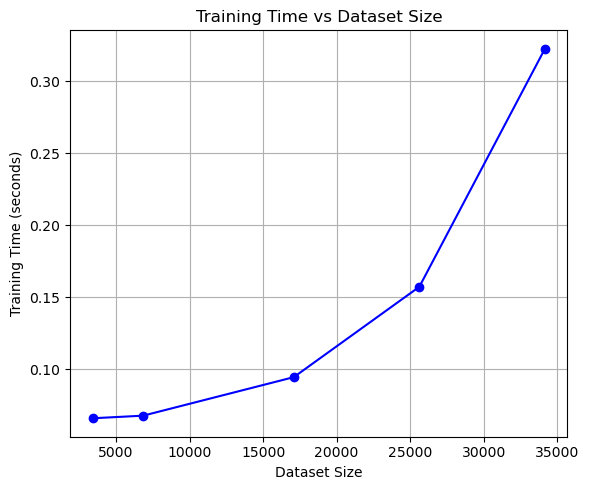

In [62]:
measure_scalability(X_tree_train, y_train,  best_dt)

Đối với decision tree, thời gian huấn luyện có xu hướng tăng trưởng từ từ theo kích thước tập dữ liệu. Tuy nhiên, thời gian huấn luyện không tăng quá mạnh, chỉ tăng khoảng 0.17s giữa các kích thước lớn nhất. Decision tree là một mô hình đơn giản và có thể mở rộng tốt với kích thước dữ liệu lớn mà không làm tăng đáng kể thời gian huấn luyện.

**Đánh giá scalability của Random forest**

Training Time for 3416 samples: 1.1787 seconds
Training Time for 6833 samples: 1.8869 seconds
Training Time for 17083 samples: 4.7831 seconds
Training Time for 25625 samples: 8.9453 seconds
Training Time for 34167 samples: 9.9674 seconds


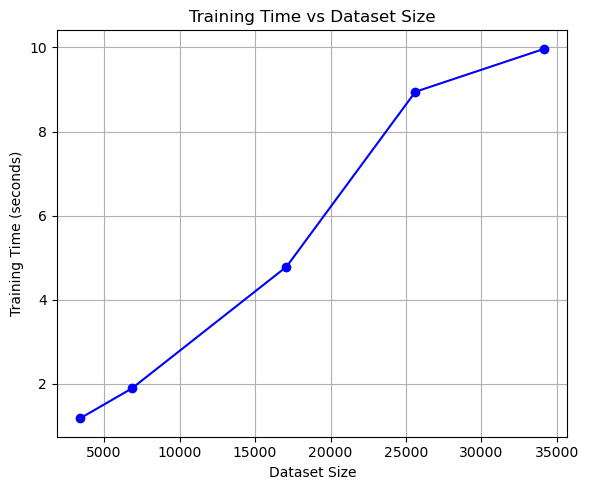

In [63]:
measure_scalability(X_tree_train, y_train, best_rf)

Thời gian huấn luyện của random forest tăng khá mạnh khi số lượng mẫu tăng lên. Random forest không phải là mô hình dễ dàng mở rộng khi số lượng mẫu lớn. Tuy nhiên, nó có thể cho kết quả chính xác hơn decision tree nhờ vào việc sử dụng nhiều cây quyết định. Do đó, đây là mô hình tốt khi chất lượng quan trọng hơn tốc độ.

**Đánh giá scalability của Gaussian Naive Bayes**

Training Time for 3416 samples: 0.0113 seconds
Training Time for 6833 samples: 0.0069 seconds
Training Time for 17083 samples: 0.0120 seconds
Training Time for 25625 samples: 0.0183 seconds
Training Time for 34167 samples: 0.0330 seconds


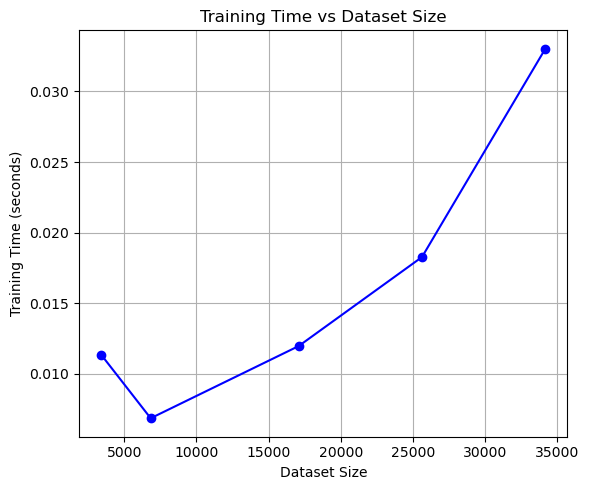

In [64]:
measure_scalability(X_nb_train, y_nb_train,  best_gnb)

Naive Bayes có thời gian huấn luyện rất nhanh và gần như không tăng đáng kể với kích thước tập dữ liệu. Mô hình này đặc biệt thích hợp cho các bài toán yêu cầu thời gian huấn luyện nhanh và khả năng mở rộng tốt. Đây là một trong những mô hình có tính scalability tốt nhất, với thời gian huấn luyện gần như không đổi ngay cả khi tăng số lượng mẫu.

**Đánh giá scalability của SVM kernel rbf**

Training Time for 3416 samples: 1.1149 seconds
Training Time for 6833 samples: 4.1680 seconds
Training Time for 17083 samples: 43.2308 seconds
Training Time for 25625 samples: 80.1273 seconds
Training Time for 34167 samples: 155.5139 seconds


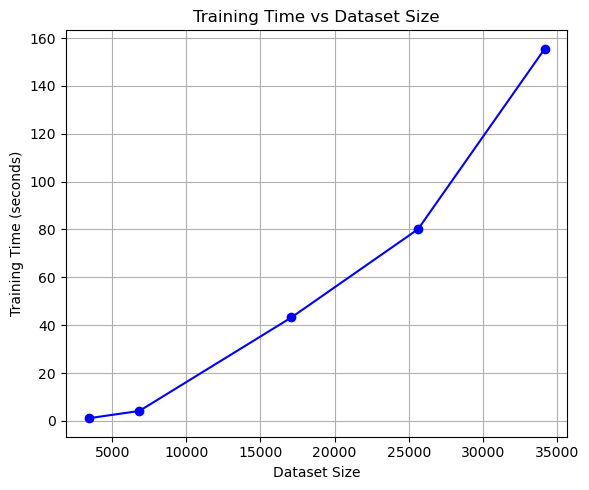

In [65]:
measure_scalability(X_svm_train, y_svm_train,  svm_rbf)

Thời gian huấn luyện của SVM với kernel RBF tăng rất nhanh khi tập dữ liệu lớn hơn. SVM với kernel RBF có độ phức tạp tính toán cao và không thể mở rộng tốt đối với các tập dữ liệu lớn. Đây là mô hình phù hợp cho các tập dữ liệu nhỏ hoặc vừa.

**Đánh giá scalability của SVM với kernel poly**

Training Time for 3416 samples: 1.0081 seconds
Training Time for 6833 samples: 4.6206 seconds
Training Time for 17083 samples: 30.5833 seconds
Training Time for 25625 samples: 65.5464 seconds
Training Time for 34167 samples: 121.2277 seconds


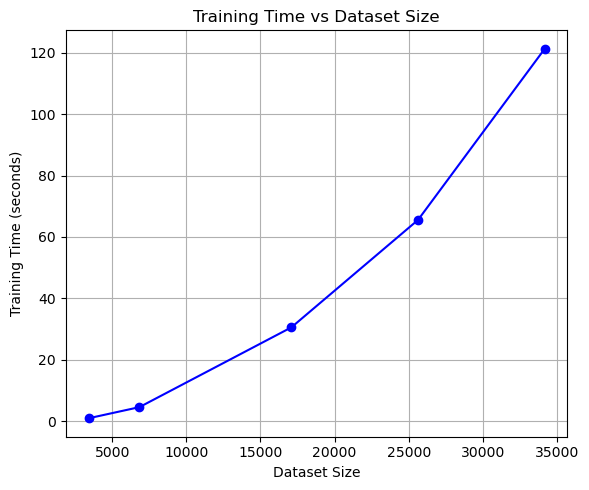

In [66]:
measure_scalability(X_svm_train, y_svm_train,  svm_pl)

 Tương tự như SVM với kernel RBF, thời gian huấn luyện của SVM với kernel polynomial cũng tăng mạnh khi tập dữ liệu mở rộng. SVM với kernel polynomial cũng có scalability kém đối với các tập dữ liệu lớn, và thời gian huấn luyện có thể trở thành vấn đề lớn khi tập dữ liệu tăng trưởng.

**Đánh giá scalability của SVM với kernel linear**

Training Time for 3416 samples: 1.3094 seconds
Training Time for 6833 samples: 6.0465 seconds
Training Time for 17083 samples: 41.6819 seconds
Training Time for 25625 samples: 90.3618 seconds
Training Time for 34167 samples: 127.6774 seconds


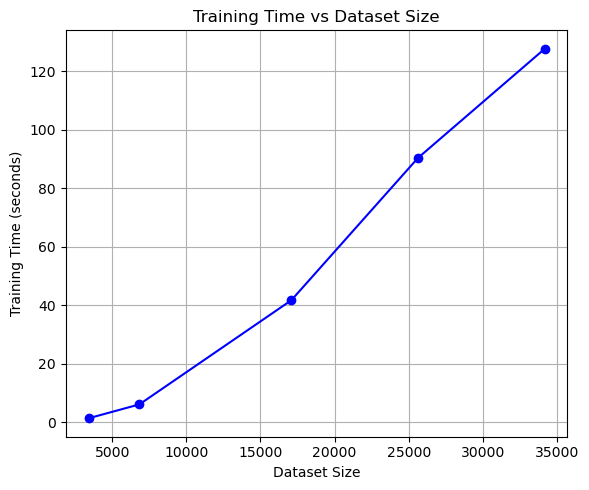

In [67]:
measure_scalability(X_svm_train, y_svm_train,  svm_ln)

 So với các kernel khác, SVM với kernel linear có thời gian huấn luyện nhanh hơn nhưng vẫn tăng nhanh theo kích thước dữ liệu. SVM với kernel linear có thể phù hợp hơn so với các kernel phi tuyến khác khi xử lý dữ liệu lớn, nhưng vẫn có chi phí tính toán đáng kể.

**Đánh giá scalability của SVM với kernel sigmoid**

Training Time for 3416 samples: 1.3270 seconds
Training Time for 6833 samples: 7.2295 seconds
Training Time for 17083 samples: 49.2575 seconds
Training Time for 25625 samples: 102.1617 seconds
Training Time for 34167 samples: 167.7975 seconds


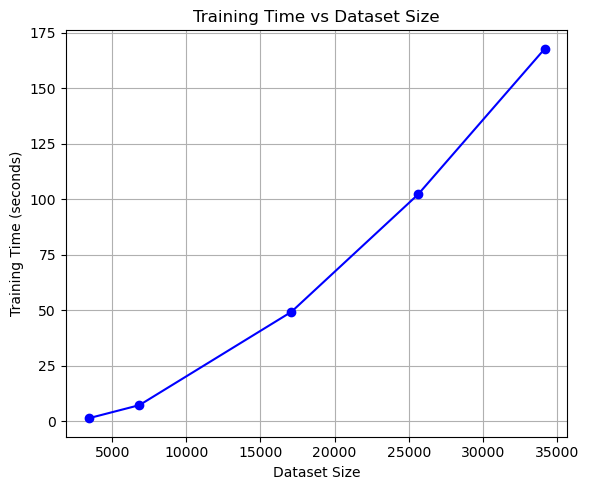

In [68]:
measure_scalability(X_svm_train, y_svm_train,svm_sm)

Thời gian huấn luyện của SVM với kernel sigmoid là rất cao khi so với các mô hình khác. SVM với kernel sigmoid không phù hợp cho các bài toán với tập dữ liệu lớn. Nó có độ phức tạp tính toán rất cao và không mở rộng tốt.

**Đánh giá scalability của Neural network**

Training Time for 3416 samples: 1.2657 seconds
Training Time for 6833 samples: 1.2213 seconds
Training Time for 17083 samples: 2.7801 seconds
Training Time for 25625 samples: 3.6829 seconds
Training Time for 34167 samples: 2.7141 seconds


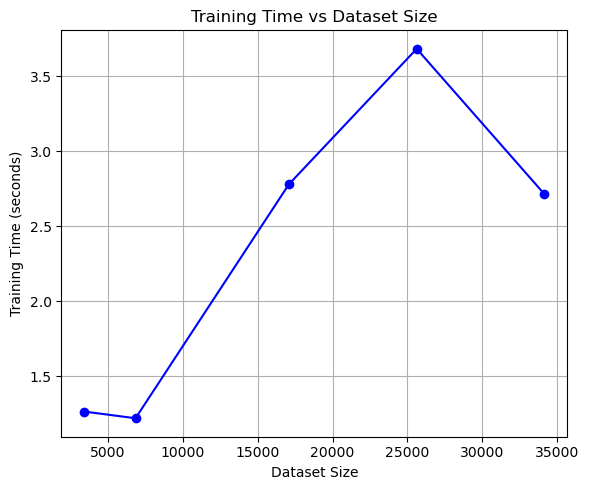

In [69]:
measure_scalability(X_nb_train, y_nb_train, mlp)

MLP có thời gian huấn luyện thay đổi không quá lớn giữa các kích thước dữ liệu.

**Kết luận về scalability:**
- Decision Tree và Naive Bayes có scalabilty tốt nhất. Random Forest có scalabilty kém hơn 2 mô hình này nhưng nhìn chung vẫn khá tốt
- Các mô hình SVM với các kernel có scalabilty kém.

### 5.3 Chọn mô hình tốt nhất

Việc chọn mô hình tốt nhất sẽ phụ thuộc hoàn toàn vào mục đích của bài toán. Em sẽ phân tích theo các tiêu chí khác nhau như khả năng phân loại, thời gian chạy, khả năng mở rộng, chi phí tinh toán,... để lựa chọn mô hình

* **Xét về khả năng phân loại**:
    - Nhắc lại về giả định bài toán em đã trình bày ở trên: Giả sử mục đích của dự án này là xây dựng một mô hình có thể phát hiện được càng nhiều người có thu nhập cao (>50K) càng tốt, và độ tin cậy khi dự doán một người có thu nhập cao (>50K) cũng phải cao (tức là ít bị nhầm lẫn với người có thu nhập thấp (<=50K)). Khi đó khả năng phân loại của mô hình sẽ được xem là xét dựa trên F1 score và auc score nhiều hơn các tiêu chí khác.
    - Random Forest và Decision Tree là 2 mô hình có khả năng phân loại tốt nhất
* **Xét về khả năng mở rộng và thời gian chạy**
    - Nếu không chú trọng về độ chính xác, chỉ chú trọng về khả năng mở rộng và thời gian chạy thì Gaussian Naive Bayes sẽ là mô hình tốt nhất. Random Forest có khả năng mỏ rộng tạm ổn và thời gian chạy chấp nhận được.
    - Hơn nữa, Gaussian Naive Bayes có recall rất cao, sẽ rất thích hợp cho các bài toán không muốn bỏ sót nhiều người có thu nhập cao (>50K)
* **Xét về chi phí tính toán**
    - Nếu chỉ chú trọng đến chi phí tính toán thì Naive Bayes là một mô hình phù hợp.
    - Random Forest và Decision tree tuy có chi phí tính toán cao hơn Naive Bayes nhưng vẫn ở mức ổn.
* **Xét về đặc điểm về tập dữ liệu:**
    - Nếu xét về đặc điểm của tập dữ liệu thì Random Forest là mô hình phù hợp nhất vì:
        - Tập dữ liệu này là một tập dữ liệu mất cân bằng (số mẫu <=50K gấp đến 3 lần số mẫu >50K). Random Forest có khả năng xử lí tốt những tập dữ liệu bị mất cân bằng
        - Random Forest có khả năng xử lí tốt trường hợp các feature có mối quan hệ phức tạp, phi tuyến.
* **Xét về tổng thể:**
    - Theo em, mô hình tốt nhất về tổng thể phù hợp với giả định bài toán trong dự án này chính là Random Forest, vì:
        - Random Forest rất phù hợp với đặc điểm của tập dữ liệu.
        - Random Forest có khả năng phân loại tốt.
        - Random Forest có khả năng khái quát tốt và ít bị overfitting.
        - Random Forest có thời gian chạy và khả năng mở rộng không phải tốt nhưng ở mức ổn.
        
    
